In [2]:
from vector import Vector
from line import Line

In [5]:
v1 = Vector([1,2,3])
v2 = Vector([1,2,3])
print(v1.plus(v2))

Vector: (Decimal('2'), Decimal('4'), Decimal('6'))


# Threshold Logic Unit (TLU) / Linear Threshold Unit(LTU)


<img src="LTU.png">

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([  [0.1, 0.1, 0.1] ])
W = np.array([  [0.01],[0.01], [0.01] ])

print('---X---')
print(X)
print('---W---')
print(W)

def step_heaviside(z):
    if z >= 0:
        return 1
    else:
        return 0

print('---Weighted Sum Z---')
z = np.dot(X,W)
print(z)
print('---Output---')
output = step_heaviside(z)
print(output)

---X---
[[0.1 0.1 0.1]]
---W---
[[0.01]
 [0.01]
 [0.01]]
---Weighted Sum Z---
[[0.003]]
---Output---
1


In [18]:


X = np.array([  [17,25,6,2] ])
print(X)
W = np.array([[3],[32], [19], [27]])
print(W)

[[17 25  6  2]]
[[ 3]
 [32]
 [19]
 [27]]


In [24]:
M = np.dot(X,W)
print(M)

[[1019]]


In [35]:
x = np.array([ [1,1,1,1], [2,2,2,2], [3,3,3,3]] )
w =  np.array([[1,2,3,4,5],[1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]])
print('---X---')
print(x)
print('---W---')
print(w)
print('Z')
dot = np.dot(x,w)
print(dot)

---X---
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
---W---
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
Z
[[ 4  8 12 16 20]
 [ 8 16 24 32 40]
 [12 24 36 48 60]]


# The Perceptron
<img src="perceptron.png">

In [46]:
"""
As always, X represents the matrix of input features. 
It has one row per instance and one column per feature.
"""
X = np.array([ [0.1,0.1] ] )
"""
The weight matrix W contains all the connection weights except for the ones from the bias neuron.
It has one row per input neuron and one column per artificial neuron in the layer.
"""
W =  np.array([  [0.1,0.2,0.3],[0.1,0.2,0.3] ])

"""
The bias vector b contains all the connection weights between the bias neuron and the artificial neurons.
It has one bias term per artificial neuron
"""
b = 1


print('---X---')
print(X)
print('---W---')
print(W)

---X---
[[0.1 0.1]]
---W---
[[0.1 0.2 0.3]
 [0.1 0.2 0.3]]


In [47]:
XW= np.dot(X,W)
input_to_Activation_function = XW + b
print(f'ø({input_to_Activation_function})')

ø([[1.02 1.04 1.06]])


## When The Artificial Neurons are TLU, the  activation function  is a step function (but this can accomodate other types of activation)

In [55]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

In [57]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [60]:
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [64]:
print(per_clf.class_weight)

None


# XOR using multilayer perceptron

<img src="XOR_MLP.png">

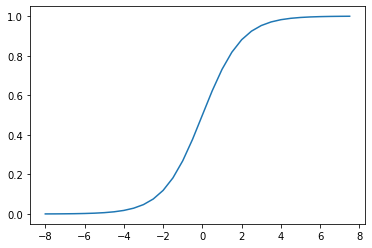

In [9]:
#Let's start by defining the activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

x = np.arange(-8,8,0.5)
z = sigmoid(x)

plt.plot(x, z)

In [56]:
#Define the Weights and Biases
W1 = np.array([[20],[20]])
B1= -10
W2 = np.array([[-20],[-20]])
B2= 30
YW = np.array([[20],[20]])
YB = -30

#Start with inputs = [1,1] which XOR is 0
X =np.array([  [1,1]  ])

#First Layer
layer1_perceptron1 = sigmoid(np.dot(X,W1) + B1)
layer1_perceptron2 = sigmoid(np.dot(X,W2) + B2)

first_layer_output = np.concatenate((layer1_perceptron1,layer1_perceptron2)).flatten()

#Output Layer
Y = sigmoid(np.dot(first_layer_output, YW) + YB)
print(X)
print(np.round(Y))

#Encapsulate in function 
def xor_mlp(X):
    #Define the Weights and Biases
    W1 = np.array([[20],[20]])
    B1= -10
    W2 = np.array([[-20],[-20]])
    B2= 30
    YW = np.array([[20],[20]])
    YB = -30

    #First Layer
    layer1_perceptron1 = sigmoid(np.dot(X,W1) + B1)
    layer1_perceptron2 = sigmoid(np.dot(X,W2) + B2)

    first_layer_output = np.concatenate((layer1_perceptron1,layer1_perceptron2)).flatten()

    #Output Layer
    Y = sigmoid(np.dot(first_layer_output, YW) + YB)
    return np.round(Y[0])

print('-----XOR-----')
xor_0_0 = xor_mlp(np.array([[0,0]]))
print(f'0 | 0 -> {xor_0_0}')

xor_0_1 = xor_mlp(np.array([[0,1]]))
print(f'0 | 1 -> {xor_0_1}')

xor_1_0 = xor_mlp(np.array([[1,0]]))
print(f'1 | 0 -> {xor_1_0}')

xor_1_1 = xor_mlp(np.array([[1,1]]))
print(f'1 | 1 -> {xor_1_1}')


[[1 1]]
[0.]
-----XOR-----
0 | 0 -> 0.0
0 | 1 -> 1.0
1 | 0 -> 1.0
1 | 1 -> 0.0
